In [1]:
%matplotlib inline

import skimage
import skimage.io
import skimage.exposure
import skimage.morphology
import skimage.segmentation
import skimage.viewer
import skimage.measure

import matplotlib
import matplotlib.pyplot as plt
import numpy
import scipy.ndimage
imflat = skimage.io.imread("flat gradient cropped.jpg")
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
tmp = ax.imshow(imflat,"gray")

ModuleNotFoundError: No module named 'skimage'

In [2]:
import sys
sys.path

['',
 '/Users/pingwu/Desktop/Toettcher-lab/DMD_test',
 '/Users/pingwu/miniconda2/envs/mypython3/lib/python37.zip',
 '/Users/pingwu/miniconda2/envs/mypython3/lib/python3.7',
 '/Users/pingwu/miniconda2/envs/mypython3/lib/python3.7/lib-dynload',
 '/Users/pingwu/miniconda2/envs/mypython3/lib/python3.7/site-packages',
 '/Users/pingwu/miniconda2/envs/mypython3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pingwu/.ipython']

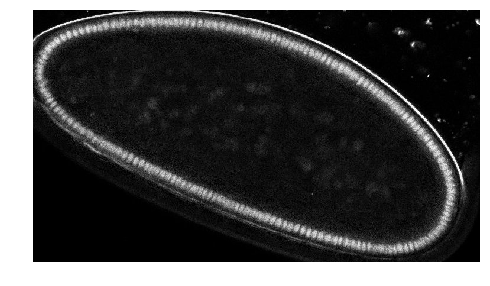

In [122]:
se1 = skimage.morphology.disk(radius=20)
imflat1 = skimage.morphology.white_tophat(imflat, selem=se1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('off')
tmp = ax.imshow(imflat1, cmap='gray')


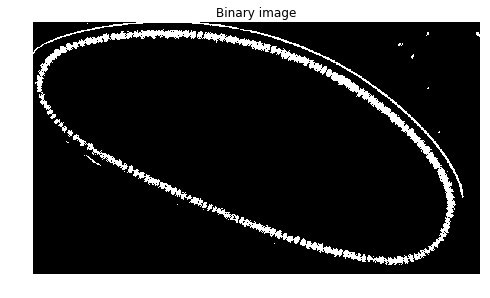

In [123]:
th = 130
imflat1 = imflat1 > th
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Binary image')
ax.axis('off')
tmp = ax.imshow(imflat1, cmap='gray')

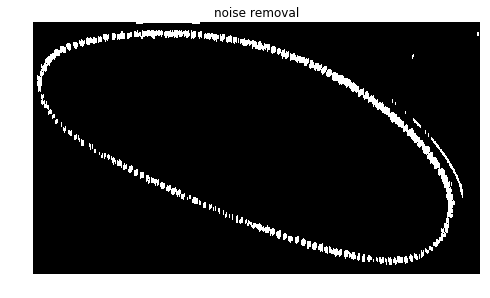

In [124]:
se2 = skimage.morphology.rectangle(6,1)
imflat2 = skimage.morphology.opening(imflat1, selem=se2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('noise removal')
ax.axis('off')
tmp = ax.imshow(imflat2, cmap='gray')


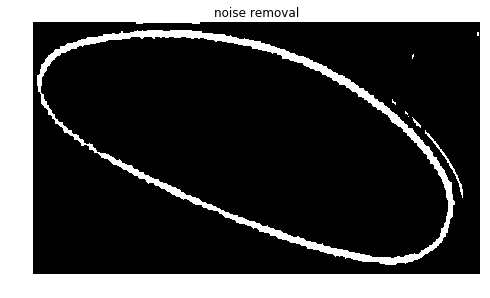

In [135]:
se2 = skimage.morphology.disk(radius =5.5)
imflat3 = skimage.morphology.closing(imflat2, selem=se2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('noise removal')
ax.axis('off')
tmp = ax.imshow(imflat3, cmap='gray')

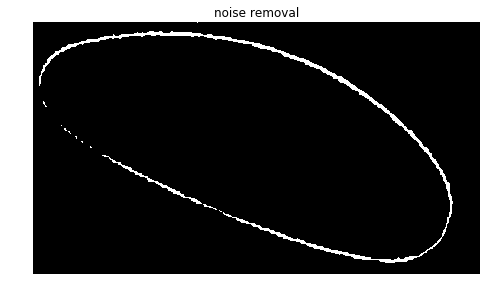

In [136]:
se2 = skimage.morphology.disk(radius = 3)
imflat4 = skimage.morphology.erosion(imflat3, selem=se2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('noise removal')
ax.axis('off')
tmp = ax.imshow(imflat4, cmap='gray')

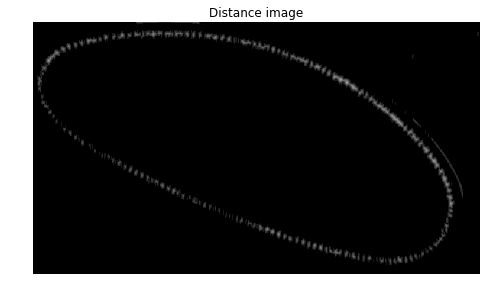

In [127]:
d = scipy.ndimage.distance_transform_edt(imflat2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Distance image')
ax.axis('off')
tmp = ax.imshow(d, cmap='gray', clim=(0, 10))

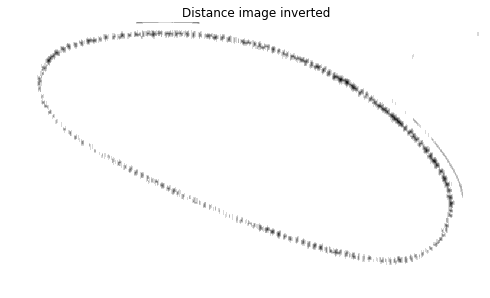

In [128]:
# Convert from peaks to troughs for watershed

d = -d
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Distance image inverted')
ax.axis('off')
tmp = ax.imshow(d, cmap='gray')

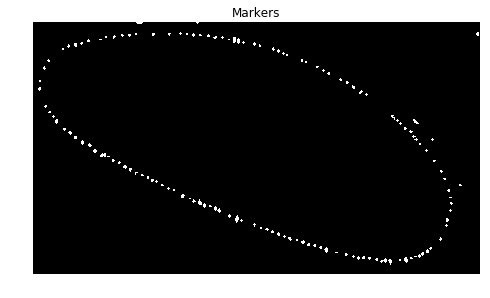

In [129]:
h = 2

markers = skimage.morphology.h_minima(d, h)
se = skimage.morphology.disk(radius=2)
markersBig = skimage.morphology.dilation(markers, se)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Markers')
ax.axis('off')
tmp = ax.imshow(markersBig, cmap='gray')

Number of nuclei: 136


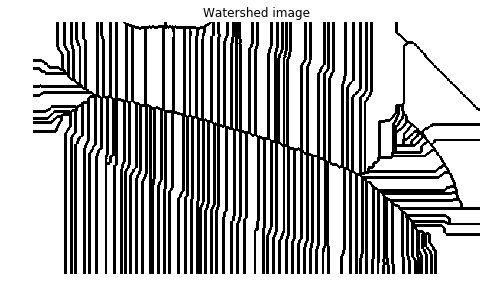

In [130]:
# Run a watershed on the distance matrix

se3 = skimage.morphology.disk(radius=2)

labeledMarkers, numFeatures = scipy.ndimage.measurements.label(markersBig)
print('Number of nuclei: %d' % numFeatures)

w = skimage.morphology.watershed(d, labeledMarkers, watershed_line=True)
# , mask=bw

# This just "widens" the erosion lines to more clearly separate objects.
    
w = skimage.morphology.erosion(w, selem=se3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Watershed image')
ax.axis('off')
tmp = ax.imshow(w, cmap='gray', clim=(0,1))

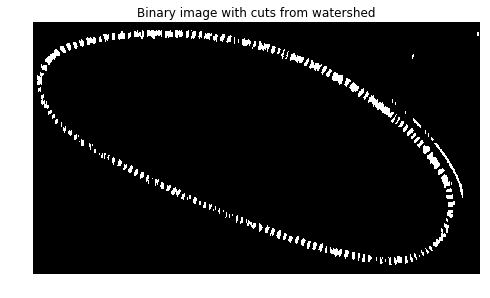

In [131]:
bwcut = numpy.logical_and(imflat2, w)  # if both pixel values are 1, give back a 1, else assign 0
    
bwcut = skimage.segmentation.clear_border(bwcut)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Binary image with cuts from watershed')
ax.axis('off')
tmp = ax.imshow(bwcut, cmap='gray')

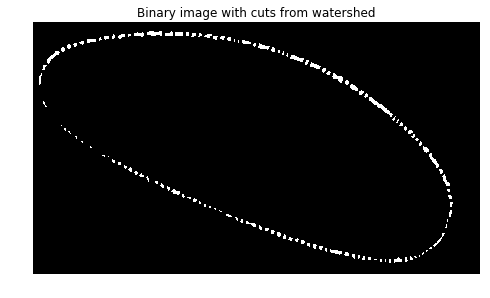

In [137]:
bwcut = numpy.logical_and(imflat4, w)  # if both pixel values are 1, give back a 1, else assign 0
    
bwcut = skimage.segmentation.clear_border(bwcut)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Binary image with cuts from watershed')
ax.axis('off')
tmp = ax.imshow(bwcut, cmap='gray')

Number of nuclei: 127


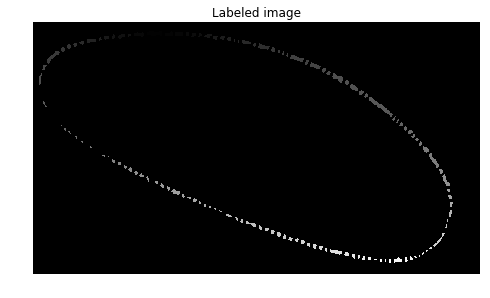

In [138]:
bwLabels, numFeatures = skimage.morphology.label(bwcut, return_num=True)
print('Number of nuclei: %d' % numFeatures)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Labeled image')
ax.axis('off')
tmp = ax.imshow(bwLabels, cmap='gray', clim=(0, numFeatures))

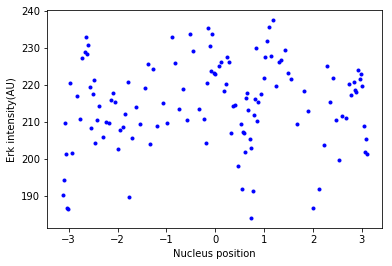

In [140]:
# get the position of each nucleus and centroid of the whole embryo
props = skimage.measure.regionprops(bwLabels, intensity_image=imflat)
xpos = []
ypos = []
bcd_conc = []
for prop in props:
    xpos.append(prop.centroid[0])
    ypos.append(prop.centroid[1])
    bcd_conc.append(prop.mean_intensity)

xmean = numpy.mean(xpos)
ymean = numpy.mean(ypos)

xpos_norm = xpos - xmean
ypos_norm = ypos - ymean


theta = numpy.arctan2(xpos_norm,ypos_norm)

plt.plot(theta,bcd_conc,"b.")
plt.xlabel("Nucleus position")
plt.ylabel("Erk intensity(AU)" )
plt.show()


